<a href="https://colab.research.google.com/github/denniss83/Turkiye_Deprem_Analizi_2000_2025/blob/main/T%C3%BCrkiye_Deprem_Analizi_(2000%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üåç T√ºrkiye Deprem Analizi (2000‚Äì2025)

üìå **Bu √ßalƒ±≈üma, 2000‚Äì2025 yƒ±llarƒ± arasƒ±nda T√ºrkiye'de meydana gelen depremlerin analiz edilmesini ama√ßlamaktadƒ±r.**  
Veriler, **AFAD Deprem Dairesi Ba≈ükanlƒ±ƒüƒ±** tarafƒ±ndan saƒülanan resmi kaynaklardan elde edilmi≈ütir. Harita bazlƒ± analizler ile zaman ve lokasyona g√∂re deprem eƒüilimleri g√∂rselle≈ütirilmi≈ütir.

---

## üéØ √áalƒ±≈ümanƒ±n Amacƒ±
- T√ºrkiye'deki depremleri ≈üehir (il) bazƒ±nda analiz etmek  
- Zaman serisi trendlerini incelemek  
- Depremlerin sƒ±klƒ±ƒüƒ±nƒ± harita √ºzerinde b√∂lgesel olarak g√∂rselle≈ütirmek  
- Veri bilimi teknikleri ile **ger√ßek d√ºnya verisi** √ºzerinde uygulamalƒ± analiz yapmak

---

## ‚ö†Ô∏è √ñnemli Notlar
- Bu √ßalƒ±≈üma **eƒüitim ve portf√∂y geli≈ütirme** amacƒ±yla hazƒ±rlanmƒ±≈ütƒ±r.  
- Deprem verileri, [AFAD Resmi Web Sitesi](https://deprem.afad.gov.tr) √ºzerinden alƒ±nmƒ±≈ütƒ±r.  
- Veri seti, **temiz ve d√ºzenli** bir ≈üekilde saƒülandƒ±ƒüƒ± i√ßin ayrƒ±ca veri temizliƒüi uygulanmamƒ±≈ütƒ±r.  
- ƒ∞statistiksel veya m√ºhendislik tabanlƒ± bir risk analizi amacƒ± **ta≈üƒ±mamaktadƒ±r**.

---

> ‚õ≥ **Not:** T√ºm analizler Python dili kullanƒ±larak yapƒ±lmƒ±≈ü, haritalar `folium` k√ºt√ºphanesiyle olu≈üturulmu≈ütur. Proje, √∂zellikle veri analitiƒüi √∂ƒürenen bireylerin uygulama geli≈ütirmesi i√ßin √∂rnek niteliƒüindedir.


In [1]:
!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import plotly.express as px
from tabulate import tabulate
import warnings
import requests
import json
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
df = pd.read_csv("data.csv")
df.head()

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0  28/06/2025 08:47:44    27.8969   37.1544   7.00  0.71   ML        1.4   
1  28/06/2025 08:37:21    31.0778   38.9236  12.70  0.64   ML        1.0   
2  28/06/2025 08:05:21    37.4844   37.7047   7.02  0.38   ML        2.0   
3  28/06/2025 07:53:33    38.4411   38.1628   7.00  0.30   ML        1.2   
4  28/06/2025 07:02:19    40.0864   38.6469   6.96  0.24   ML        1.9   

                    Location  EventID  
0              Milas (Muƒüla)   665576  
1  Bolvadin (Afyonkarahisar)   665577  
2         G√∂lba≈üƒ± (Adƒ±yaman)   665575  
3       Battalgazi (Malatya)   665574  
4              Palu (Elazƒ±ƒü)   665573

# üìä Deprem Verilerinin Genel √ñzeti (2000‚Äì2025)

Bu b√∂l√ºmde, 2000‚Äì2025 yƒ±llarƒ± arasƒ±nda T√ºrkiye‚Äôde meydana gelen toplam deprem sayƒ±sƒ± analiz edilmi≈ütir. Ayrƒ±ca b√ºy√ºkl√ºƒü√º 3.5 ve √ºzeri olan depremler filtrelenmi≈ü, sƒ±klƒ±klarƒ± hesaplanmƒ±≈ütƒ±r.

Ayrƒ±ca, b√ºy√ºkl√ºk deƒüerine g√∂re en ≈üiddetli ilk 20 deprem tablo halinde sunulmu≈ütur. Bu sayede analiz edilen d√∂nem boyunca en etkili depremler kolayca g√∂r√ºlebilir.

### ƒ∞√ßerik:
- Toplam deprem sayƒ±sƒ±
- 3.5 ve √ºzeri b√ºy√ºkl√ºƒüe sahip depremler
- 5.0 ve √ºzeri b√ºy√ºkl√ºƒüe sahip depremler
- En b√ºy√ºk 20 depremin listesi (b√ºy√ºkl√ºƒüe g√∂re sƒ±ralƒ±)

> **Not:** B√ºy√ºkl√ºk sƒ±nƒ±flandƒ±rmasƒ± `Magnitude` s√ºtunu baz alƒ±narak yapƒ±lmƒ±≈ütƒ±r.

## üìå Deprem Verileri (2000‚Äì2025 arasƒ±, t√ºm veri)

Bu b√∂l√ºmde T√ºrkiye‚Äôde 2000‚Äì2025 yƒ±llarƒ± arasƒ±nda kaydedilen toplam deprem sayƒ±sƒ± ve b√ºy√ºkl√ºk daƒüƒ±lƒ±mƒ± incelenmi≈ütir. 3.5 ve 5.0 √ºzeri depremlerin sayƒ±sƒ± √∂zetlenmi≈ütir.

In [5]:
tum_deprem_sayisi = len(df)
deprem_35_ustu = len(df[df['Magnitude'] >= 3.5])
deprem_5_ustu = len(df[df['Magnitude'] >= 5.0])

veriler = [
    ["Toplam Deprem Sayƒ±sƒ±", tum_deprem_sayisi],
    ["3.5 ve √úzeri Depremler", deprem_35_ustu],
    ["5.0 ve √úzeri Depremler", deprem_5_ustu]
]
print("\nüìå Deprem Verileri (2000‚Äì2025 arasƒ±, t√ºm veri)")
print(tabulate(veriler, headers=["Kategori", "Sayƒ±"], tablefmt="fancy_grid"))



üìå Deprem Verileri (2000‚Äì2025 arasƒ±, t√ºm veri)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Kategori               ‚îÇ   Sayƒ± ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Toplam Deprem Sayƒ±sƒ±   ‚îÇ 497309 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 3.5 ve √úzeri Depremler ‚îÇ  12055 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 5.0 ve √úzeri Depremler ‚îÇ    291 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


## üåç En B√ºy√ºk ƒ∞lk 20 Deprem (2000‚Äì2025)

Bu tabloda, b√ºy√ºkl√ºk bakƒ±mƒ±ndan en ≈üiddetli ilk 20 deprem listelenmi≈ütir. Tarih, lokasyon ve b√ºy√ºkl√ºk bilgileri sunularak depremlerin etkisi vurgulanmƒ±≈ütƒ±r.


In [25]:
en_buyuk_20 = df.sort_values(by="Magnitude", ascending=False).head(20)
en_buyuk_20 = en_buyuk_20[["Date", "Location", "Magnitude"]]
print("\nüìå \033[1mEn B√ºy√ºk ƒ∞lk 20 Deprem (2000‚Äì2025)\033[0m")
print(tabulate(en_buyuk_20.values, headers=["Tarih", "Lokasyon", "B√ºy√ºkl√ºk"], tablefmt="fancy_grid"))


üìå En B√ºy√ºk ƒ∞lk 20 Deprem (2000‚Äì2025)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Tarih               ‚îÇ Lokasyon                                       ‚îÇ   B√ºy√ºkl√ºk ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2023-02-06 01:17:32 ‚îÇ Pazarcƒ±k (Kahramanmara≈ü)                       ‚îÇ        7.7 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

## üìà En √áok Deprem Olan ƒ∞lk 10 ƒ∞l / ƒ∞l√ße (2000‚Äì2025)

Deprem sayƒ±sƒ±na g√∂re sƒ±ralanmƒ±≈ü en aktif 10 il veya il√ße bu tabloda sunulmu≈ütur. T√ºrkiye‚Äônin deprem a√ßƒ±sƒ±ndan en hareketli b√∂lgeleri belirlenmi≈ütir.


In [26]:
en_cok_deprem_ilk10 = df['Location'].value_counts().head(10).reset_index()
en_cok_deprem_ilk10.columns = ['Lokasyon', 'Deprem Sayƒ±sƒ±']

from tabulate import tabulate

print("\nüìå \033[1mEn √áok Deprem Olan ƒ∞lk 10 ƒ∞l / ƒ∞l√ße (2000‚Äì2025)\033[0m")
print(tabulate(en_cok_deprem_ilk10.values, headers=en_cok_deprem_ilk10.columns, tablefmt="fancy_grid"))


üìå En √áok Deprem Olan ƒ∞lk 10 ƒ∞l / ƒ∞l√ße (2000‚Äì2025)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Lokasyon               ‚îÇ   Deprem Sayƒ±sƒ± ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Simav (K√ºtahya)        ‚îÇ           13760 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Akhisar (Manisa)       ‚îÇ            8918 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Tu≈üba (Van)            ‚îÇ            8507 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ P√ºt√ºrge (Malatya)      ‚îÇ            7675 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚

## üî¥ 5.0 ve √úzeri En √áok Deprem Olan ƒ∞lk 10 ƒ∞l / ƒ∞l√ße (2000‚Äì2025)

B√ºy√ºkl√ºƒü√º 5.0 ve √ºzeri olan depremlerin en sƒ±k g√∂r√ºld√ºƒü√º ilk 10 yerle≈üim b√∂lgesi g√∂sterilmi≈ütir. Bu b√∂lgeler ciddi sismik aktiviteye sahiptir.


In [27]:
df_5ustu = df[df['Magnitude'] >= 5.0]

en_cok_5ustu = df_5ustu['Location'].value_counts().head(10).reset_index()
en_cok_5ustu.columns = ['Lokasyon', '5.0+ Deprem Sayƒ±sƒ±']

print("\nüìå \033[1m5.0 ve √úzeri En √áok Deprem Olan ƒ∞lk 10 ƒ∞l / ƒ∞l√ße (2000‚Äì2025)\033[0m")
print(tabulate(en_cok_5ustu.values, headers=en_cok_5ustu.columns, tablefmt="fancy_grid"))


üìå 5.0 ve √úzeri En √áok Deprem Olan ƒ∞lk 10 ƒ∞l / ƒ∞l√ße (2000‚Äì2025)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Lokasyon                 ‚îÇ   5.0+ Deprem Sayƒ±sƒ± ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ G√∂ksun (Kahramanmara≈ü)   ‚îÇ                   11 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Ye≈üilyurt (Malatya)      ‚îÇ                    8 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Karlƒ±ova (Bing√∂l)        ‚îÇ                    8 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

## üìç Deprem Sƒ±klƒ±ƒüƒ±na G√∂re En Sƒ±k Deprem Olan ƒ∞lk 10 Lokasyon (2000‚Äì2025)

Yerle≈üim bazƒ±nda (≈üehir/il√ße/semt) en sƒ±k deprem ya≈üanan 10 lokasyon analiz edilmi≈ütir. Mikro d√ºzeyde riskli b√∂lgeler belirlenmi≈ütir.


In [28]:
toplam_gun = 25 * 365

deprem_sayilari = df['Location'].value_counts().reset_index()
deprem_sayilari.columns = ['Lokasyon', 'Deprem Sayƒ±sƒ±']

deprem_sayilari['G√ºnl√ºk Ortalama'] = deprem_sayilari['Deprem Sayƒ±sƒ±'] / toplam_gun

en_sik_10 = deprem_sayilari.sort_values(by='G√ºnl√ºk Ortalama', ascending=False).head(10)

from tabulate import tabulate

print("\nüìå \033[1mDeprem Sƒ±klƒ±ƒüƒ±na G√∂re En Sƒ±k Deprem Olan ƒ∞lk 10 Lokasyon (2000‚Äì2025)\033[0m")
print(tabulate(en_sik_10.values, headers=en_sik_10.columns, tablefmt="fancy_grid"))


üìå Deprem Sƒ±klƒ±ƒüƒ±na G√∂re En Sƒ±k Deprem Olan ƒ∞lk 10 Lokasyon (2000‚Äì2025)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Lokasyon               ‚îÇ   Deprem Sayƒ±sƒ± ‚îÇ   G√ºnl√ºk Ortalama ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Simav (K√ºtahya)        ‚îÇ           13760 ‚îÇ          1.50795  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Akhisar (Manisa)       ‚îÇ            8918 ‚îÇ          0.977315 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

## üìä Yƒ±llara G√∂re 5.0 ve √úzeri Deprem Sayƒ±sƒ± (2000‚Äì2025)

Her yƒ±l meydana gelen 5.0 √ºzeri depremlerin sayƒ±sƒ± grafiƒüe d√∂k√ºlerek yƒ±llara g√∂re eƒüilim (trend) analizi yapƒ±lmƒ±≈ütƒ±r.


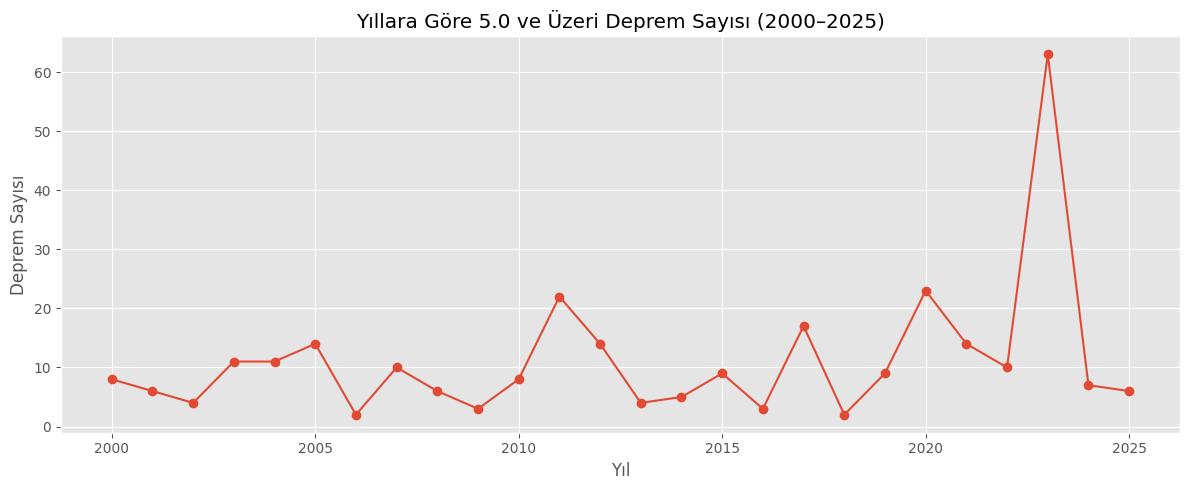

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Yƒ±l'] = df['Date'].dt.year

df_yillik_5ustu = df[df['Magnitude'] >= 5.0].groupby('Yƒ±l').size().reset_index(name='5.0+ Deprem Sayƒ±sƒ±')

plt.figure(figsize=(12, 5))
plt.plot(df_yillik_5ustu['Yƒ±l'], df_yillik_5ustu['5.0+ Deprem Sayƒ±sƒ±'], marker='o')
plt.title('Yƒ±llara G√∂re 5.0 ve √úzeri Deprem Sayƒ±sƒ± (2000‚Äì2025)')
plt.xlabel('Yƒ±l')
plt.ylabel('Deprem Sayƒ±sƒ±')
plt.grid(True)
plt.tight_layout()
plt.show()

## üìÖ Aylara G√∂re Deprem Daƒüƒ±lƒ±mƒ± (2000‚Äì2025)

Depremlerin ay bazlƒ± daƒüƒ±lƒ±mƒ± analiz edilmi≈ütir. Bu sayede mevsimsel veya d√∂nemsel bir yoƒüunluk olup olmadƒ±ƒüƒ± g√∂r√ºlmektedir.


In [11]:
df['Ay'] = df['Date'].dt.month
df_aylik = df.groupby('Ay').size().reset_index(name='Deprem Sayƒ±sƒ±')

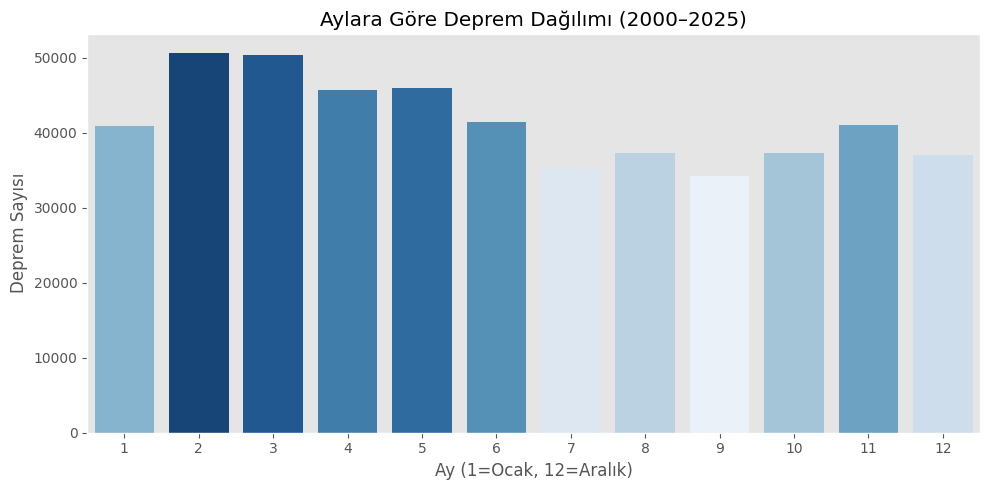

In [12]:
siralama = df_aylik['Deprem Sayƒ±sƒ±'].rank(method='min')
renkler = sns.color_palette("Blues", n_colors=12)
renk_map = [renkler[int(i) - 1] for i in siralama]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_aylik, x='Ay', y='Deprem Sayƒ±sƒ±', palette=renk_map)

plt.title('Aylara G√∂re Deprem Daƒüƒ±lƒ±mƒ± (2000‚Äì2025)')
plt.xlabel('Ay (1=Ocak, 12=Aralƒ±k)')
plt.ylabel('Deprem Sayƒ±sƒ±')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## üåê Derinliƒüe G√∂re Deprem Yoƒüunluƒüu (2000‚Äì2025)

Depremlerin odak derinliklerine g√∂re daƒüƒ±lƒ±mƒ± incelenmi≈ütir. Y√ºzeysel ve derin depremler farklƒ± renklendirme ile g√∂sterilmi≈ütir.

In [13]:
max_depth = df['Depth'].max()

bins = [0, 10, 30, 70, 300, 700]
if max_depth > 700:
    bins.append(max_depth + 1)

labels = ['0‚Äì10 km', '10‚Äì30 km', '30‚Äì70 km', '70‚Äì300 km', '300‚Äì700 km']
if max_depth > 700:
    labels.append('700+ km')

df['Derinlik_Kategori'] = pd.cut(df['Depth'], bins=bins, labels=labels)

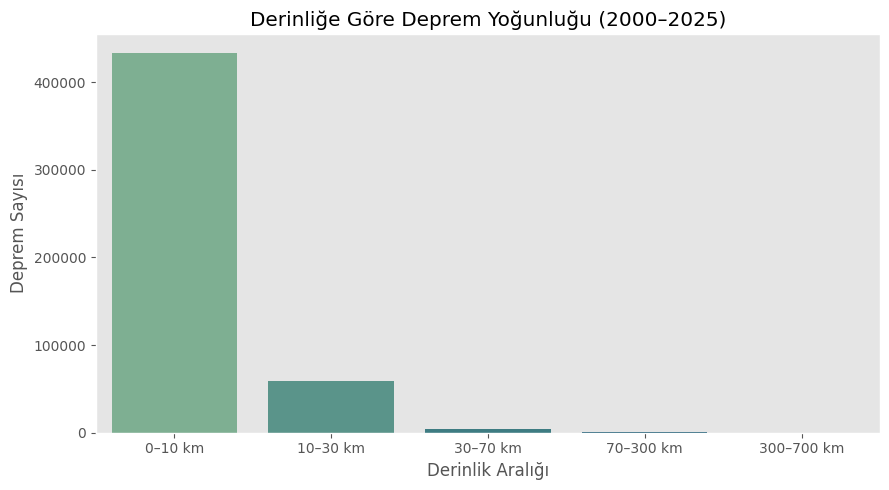

In [14]:
df_depth = df['Derinlik_Kategori'].value_counts().sort_index().reset_index()
df_depth.columns = ['Derinlik Aralƒ±ƒüƒ±', 'Deprem Sayƒ±sƒ±']

plt.figure(figsize=(9, 5))
sns.barplot(data=df_depth, x='Derinlik Aralƒ±ƒüƒ±', y='Deprem Sayƒ±sƒ±', palette='crest')

plt.title('Derinliƒüe G√∂re Deprem Yoƒüunluƒüu (2000‚Äì2025)')
plt.xlabel('Derinlik Aralƒ±ƒüƒ±')
plt.ylabel('Deprem Sayƒ±sƒ±')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## üìè B√ºy√ºkl√ºk Aralƒ±klarƒ±na G√∂re Deprem Sƒ±klƒ±ƒüƒ± (2000‚Äì2025)

Magnitude deƒüerine g√∂re gruplandƒ±rƒ±larak hangi b√ºy√ºkl√ºkte depremlerin ne sƒ±klƒ±kla meydana geldiƒüi histogram grafiƒüi ile sunulmu≈ütur.


In [15]:
df['Buyukluk_Kategori'] = pd.cut(
    df['Magnitude'],
    bins=[0, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 10],
    labels=['<3.0', '3.0‚Äì3.9', '4.0‚Äì4.9', '5.0‚Äì5.9', '6.0‚Äì6.9', '7.0‚Äì7.9', '8.0+']
)

df_mag = df['Buyukluk_Kategori'].value_counts().sort_index().reset_index()
df_mag.columns = ['B√ºy√ºkl√ºk Aralƒ±ƒüƒ±', 'Deprem Sayƒ±sƒ±']

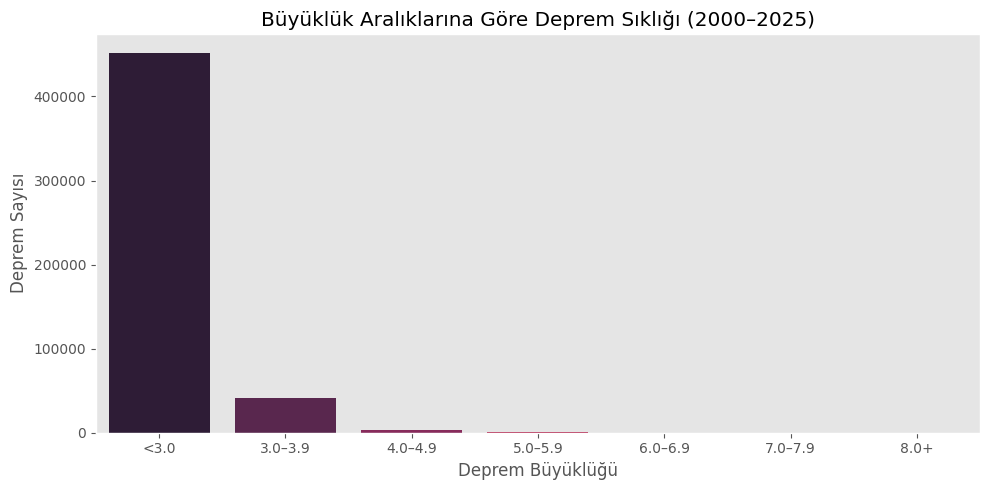

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mag, x='B√ºy√ºkl√ºk Aralƒ±ƒüƒ±', y='Deprem Sayƒ±sƒ±', palette='rocket')

plt.title('B√ºy√ºkl√ºk Aralƒ±klarƒ±na G√∂re Deprem Sƒ±klƒ±ƒüƒ± (2000‚Äì2025)')
plt.xlabel('Deprem B√ºy√ºkl√ºƒü√º')
plt.ylabel('Deprem Sayƒ±sƒ±')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## üèôÔ∏è ƒ∞lk 5 Lokasyonda Yƒ±llara G√∂re Deprem Sayƒ±sƒ± (2000‚Äì2025)

Deprem sayƒ±sƒ± a√ßƒ±sƒ±ndan en aktif ilk 5 lokasyonda yƒ±llara g√∂re deprem sayƒ±sƒ±nƒ±n nasƒ±l deƒüi≈ütiƒüi g√∂sterilmi≈ütir. Zaman serisi bazlƒ± bir kar≈üƒ±la≈ütƒ±rmadƒ±r.

In [17]:
ilk5_lokasyon = df['Location'].value_counts().head(5).index.tolist()

In [18]:
df_ilk5 = df[df['Location'].isin(ilk5_lokasyon)]
df_yil_lokasyon = df_ilk5.groupby(['Yƒ±l', 'Location']).size().unstack().fillna(0)

<Figure size 1200x600 with 0 Axes>

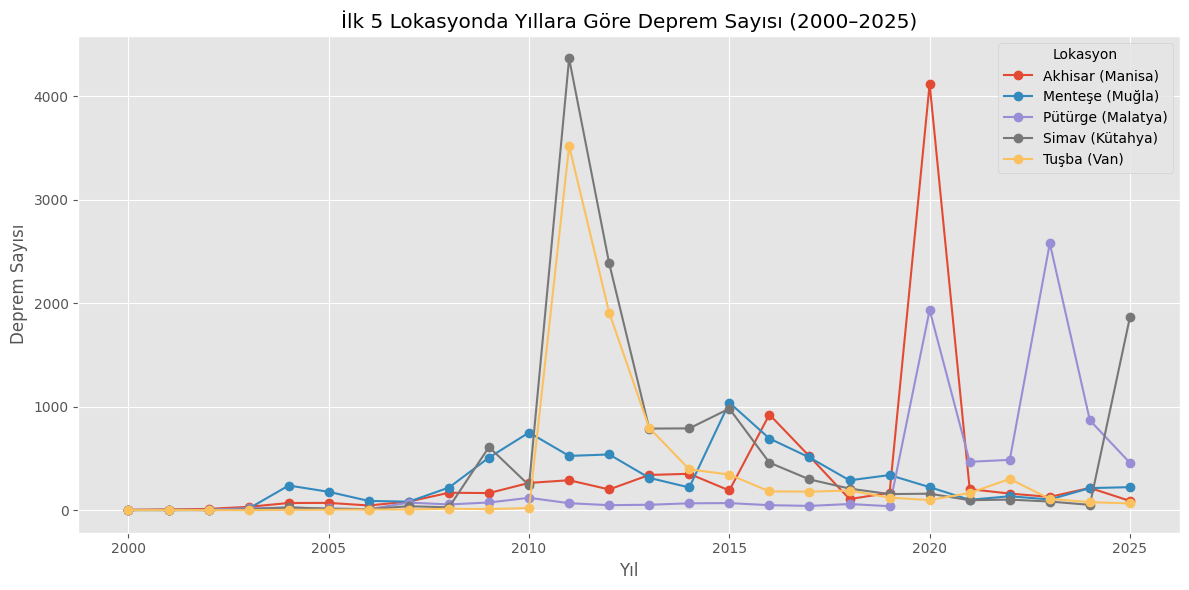

In [19]:
plt.figure(figsize=(12, 6))
df_yil_lokasyon.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('ƒ∞lk 5 Lokasyonda Yƒ±llara G√∂re Deprem Sayƒ±sƒ± (2000‚Äì2025)')
plt.xlabel('Yƒ±l')
plt.ylabel('Deprem Sayƒ±sƒ±')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Lokasyon')
plt.show()

# üó∫Ô∏è T√ºrkiye Haritasƒ±nda Deprem Yoƒüunluƒüu G√∂rselle≈ütirmesi (2000‚Äì2025)

Bu b√∂l√ºmde, T√ºrkiye'deki iller bazƒ±nda 2000‚Äì2025 yƒ±llarƒ± arasƒ±nda meydana gelen toplam deprem sayƒ±larƒ± g√∂rselle≈ütirilmi≈ütir. Her il renklendirilerek, deprem yoƒüunluƒüu ye≈üilden kƒ±rmƒ±zƒ±ya doƒüru g√∂sterilmi≈ütir (ye≈üil: az deprem, kƒ±rmƒ±zƒ±: √ßok deprem).

üìå **Harita verisi**: T√ºrkiye ≈üehir sƒ±nƒ±rlarƒ± GeoJSON dosyasƒ±  
üîó Kaynak: [alpers/Turkey-Maps-GeoJSON (GitHub)](https://github.com/alpers/Turkey-Maps-GeoJSON)  
üîí Lisans: Apache License 2.0

üîç Harita √ºzerinde fare ile herhangi bir ile geldiƒüinizde, o ilde meydana gelen toplam deprem sayƒ±sƒ± g√∂sterilir.


In [20]:
df['il'] = df['Location'].str.extract(r'\((.*?)\)')

depremler_iller = df['il'].value_counts().reset_index()
depremler_iller.columns = ['il', 'deprem_sayisi']

In [21]:
ortalama = depremler_iller['deprem_sayisi'].mean()
deprem_dict = dict(zip(depremler_iller['il'], depremler_iller['deprem_sayisi']))

In [22]:
url = "https://raw.githubusercontent.com/alpers/Turkey-Maps-GeoJSON/master/tr-cities.json"

In [23]:
response = requests.get(url)
geo_data = response.json()

In [24]:
import folium
from folium.features import GeoJsonTooltip

ortalama = depremler_iller['deprem_sayisi'].mean()

deprem_dict = dict(zip(depremler_iller['il'], depremler_iller['deprem_sayisi']))

for feature in geo_data['features']:
    il_adi = feature['properties']['name']
    feature['properties']['deprem_sayisi'] = deprem_dict.get(il_adi, 0)

def style_function(feature):
    deprem_sayisi = feature['properties']['deprem_sayisi']

    if deprem_sayisi < ortalama / 2:
        color = '#31a354'
    elif deprem_sayisi > ortalama * 2:
        color = '#de2d26'
    elif ortalama / 2 <= deprem_sayisi <= ortalama:
        color = '#ffeda0'
    else:
        color = '#feb24c'

    return {
        'fillOpacity': 0.8,
        'weight': 1,
        'color': 'blue',
        'fillColor': color
    }

m = folium.Map(location=[39.0, 35.0], zoom_start=6)

folium.GeoJson(
    geo_data,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'deprem_sayisi'],
        aliases=['ƒ∞l:', 'Deprem Sayƒ±sƒ±:'],
        localize=True,
        labels=True,
        sticky=True
    )
).add_to(m)

m